In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv('fedex.csv')

In [3]:
data.shape

(3604175, 15)

Checking the number of missing values ine each column.

In [4]:
data.isna().sum()

Year                         0
Month                        0
DayofMonth                   0
DayOfWeek                    0
Actual_Shipment_Time     81602
Planned_Shipment_Time        0
Planned_Delivery_Time        0
Carrier_Name                 0
Carrier_Num                  0
Planned_TimeofTravel       547
Shipment_Delay           81602
Source                       0
Destination                  0
Distance                     0
Delivery_Status          81602
dtype: int64

Creating a correlation heatmap before handling the missing values

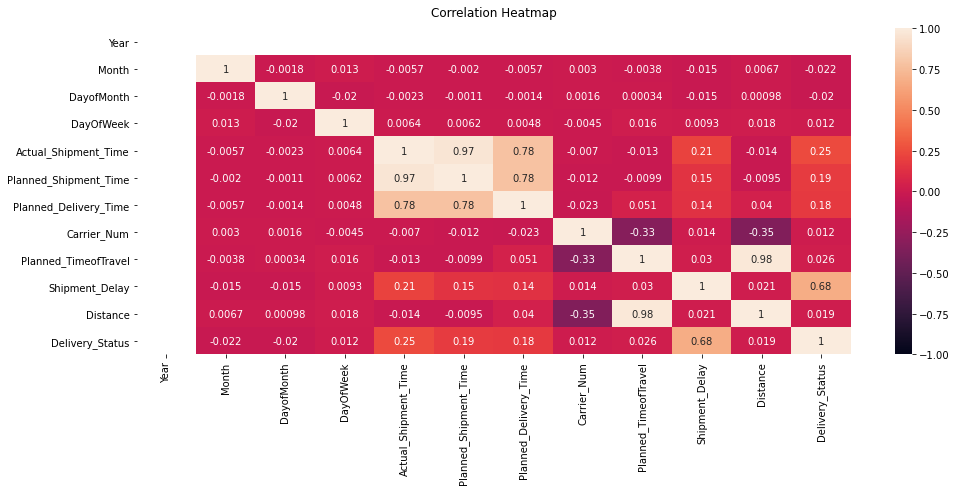

In [5]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Handling missing values and dropping the year, month, dayofMonth, DayofWeek and Carrier_num columns as it does not have any impact and they are not correlated with the delivery_status (target variable)

In [6]:
data.drop(['Year'], axis = 1, inplace = True)
data.drop(['Month'], axis = 1, inplace = True)
data.drop(['DayofMonth'], axis = 1, inplace = True)
data.drop(['DayOfWeek'], axis = 1, inplace = True)
data.drop(['Carrier_Num'], axis = 1, inplace = True)

In [7]:
data['Actual_Shipment_Time'] = data['Actual_Shipment_Time'].fillna(data['Actual_Shipment_Time'].mean())
data['Planned_TimeofTravel'] = data['Planned_TimeofTravel'].fillna(data['Planned_TimeofTravel'].mean())
data['Shipment_Delay'] = data['Shipment_Delay'].fillna(data['Shipment_Delay'].mean())
data['Delivery_Status'] = data['Delivery_Status'].fillna(data['Delivery_Status'].mode()[0])

As you can see no missing values remain

In [8]:
data.isnull().sum()

Actual_Shipment_Time     0
Planned_Shipment_Time    0
Planned_Delivery_Time    0
Carrier_Name             0
Planned_TimeofTravel     0
Shipment_Delay           0
Source                   0
Destination              0
Distance                 0
Delivery_Status          0
dtype: int64

Creating new Correlation heatmap

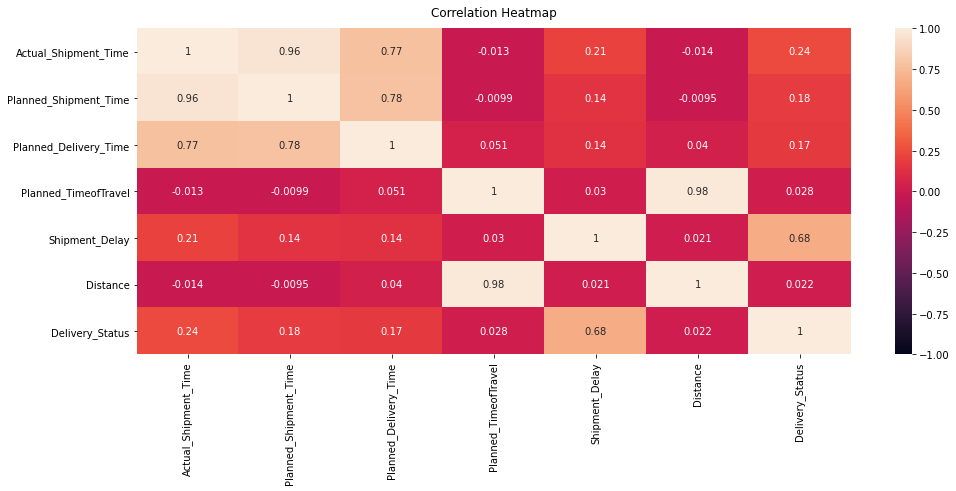

In [9]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [10]:
categorical_cols = ['Source', 'Destination', 'Carrier_Name']

data = dd.get_dummies(data=data, columns=categorical_cols)

In [11]:
data.describe()

,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Planned_TimeofTravel,Shipment_Delay,Distance,Delivery_Status,Source_ABE,Source_ABI,Source_ABQ,Source_ABY,Source_ACK,Source_ACT,Source_ACV,Source_ACY,Source_ADK,Source_ADQ,Source_AEX,Source_AGS,Source_AKN,Source_ALB,Source_ALO,Source_AMA,Source_ANC,Source_ASE,Source_ATL,Source_ATW,Source_AUS,Source_AVL,Source_AVP,Source_AZO,Source_BDL,Source_BET,Source_BFL,Source_BGM,Source_BGR,Source_BHM,Source_BIL,Source_BIS,Source_BJI,Source_BLI,Source_BMI,Source_BNA,Source_BOI,Source_BOS,Source_BPT,Source_BQK,Source_BQN,Source_BRO,Source_BRW,Source_BTM,Source_BTR,Source_BTV,Source_BUF,Source_BUR,Source_BWI,Source_BZN,Source_CAE,Source_CAK,Source_CDC,Source_CDV,Source_CEC,Source_CHA,Source_CHO,Source_CHS,Source_CIC,Source_CID,Source_CLD,Source_CLE,Source_CLL,Source_CLT,Source_CMH,Source_CMI,Source_CMX,Source_COD,Source_COS,Source_CPR,Source_CRP,Source_CRW,Source_CSG,Source_CVG,Source_CWA,Source_DAB,Source_DAL,Source_DAY,Source_DBQ,Source_DCA,Source_DEN,Source_DFW,Source_DHN,Source_DLG,Source_DLH,Source_DRO,Source_DSM,Source_DTW,Source_EGE,Source_EKO,Source_ELM,Source_ELP,Source_ERI,Source_EUG,Source_EVV,Source_EWN,Source_EWR,Source_EYW,Source_FAI,Source_FAR,Source_FAT,Source_FAY,Source_FCA,Source_FLG,Source_FLL,Source_FLO,Source_FNT,Source_FSD,Source_FSM,Source_FWA,Source_GCC,Source_GEG,Source_GFK,Source_GGG,Source_GJT,Source_GNV,Source_GPT,Source_GRB,Source_GRK,Source_GRR,Source_GSO,Source_GSP,Source_GST,Source_GTF,Source_GTR,Source_GUC,Source_HDN,Source_HHH,Source_HLN,Source_HNL,Source_HOU,Source_HPN,Source_HRL,Source_HSV,Source_IAD,Source_IAH,Source_ICT,Source_IDA,Source_ILM,Source_IND,Source_INL,Source_IPL,Source_ISP,Source_ITO,Source_IYK,Source_JAC,Source_JAN,Source_JAX,Source_JFK,Source_JNU,Source_KOA,Source_KTN,Source_LAN,Source_LAS,Source_LAW,Source_LAX,Source_LBB,Source_LCH,Source_LEX,Source_LFT,Source_LGA,Source_LGB,Source_LIH,Source_LIT,Source_LNK,Source_LRD,Source_LSE,Source_LWB,Source_LWS,Source_LYH,Source_MAF,Source_MBS,Source_MCI,Source_MCN,Source_MCO,Source_MDT,Source_MDW,Source_MEI,Source_MEM,Source_MFE,Source_MFR,Source_MGM,Source_MHT,Source_MIA,Source_MKE,Source_MKG,Source_MLB,Source_MLI,Source_MLU,Source_MOB,Source_MOD,Source_MOT,Source_MQT,Source_MRY,Source_MSN,Source_MSO,Source_MSP,Source_MSY,Source_MTJ,Source_MYR,Source_OAJ,Source_OAK,Source_OGG,Source_OKC,Source_OMA,Source_OME,Source_ONT,Source_ORD,Source_ORF,Source_OTZ,Source_OXR,Source_PBI,Source_PDX,Source_PFN,Source_PHF,Source_PHL,Source_PHX,Source_PIA,Source_PIH,Source_PIT,Source_PLN,Source_PMD,Source_PNS,Source_PSC,Source_PSE,Source_PSG,Source_PSP,Source_PVD,Source_PWM,Source_RAP,Source_RDD,Source_RDM,Source_RDU,Source_RFD,Source_RHI,Source_RIC,Source_RKS,Source_RNO,Source_ROA,Source_ROC,Source_ROW,Source_RST,Source_RSW,...,Destination_CPR,Destination_CRP,Destination_CRW,Destination_CSG,Destination_CVG,Destination_CWA,Destination_CYS,Destination_DAB,Destination_DAL,Destination_DAY,Destination_DBQ,Destination_DCA,Destination_DEN,Destination_DFW,Destination_DHN,Destination_DLG,Destination_DLH,Destination_DRO,Destination_DSM,Destination_DTW,Destination_EGE,Destination_EKO,Destination_ELM,Destination_ELP,Destination_ERI,Destination_EUG,Destination_EVV,Destination_EWN,Destination_EWR,Destination_EYW,Destination_FAI,Destination_FAR,Destination_FAT,Destination_FAY,Destination_FCA,Destination_FLG,Destination_FLL,Destination_FLO,Destination_FNT,Destination_FSD,Destination_FSM,Destination_FWA,Destination_GCC,Destination_GEG,Destination_GFK,Destination_GGG,Destination_GJT,Destination_GNV,Destination_GPT,Destination_GRB,Destination_GRK,Destination_GRR,Destination_GSO,Destination_GSP,Destination_GST,Destination_GTF,Destination_GTR,Destination_GUC,Destination_HDN,Destination_HHH,Destination_HLN,Destination_HNL,Destination_HOU,Destination_HPN,Destination_HRL,Destination_HSV,Destination_IAD,Destination_IAH,Destination_ICT,Destination_IDA,Destination_ILM,Destination_IND,Destination_INL,Destination_IPL,Destination_

In [12]:
data.head()

,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Planned_TimeofTravel,Shipment_Delay,Distance,Delivery_Status,Source_ABE,Source_ABI,Source_ABQ,Source_ABY,Source_ACK,Source_ACT,Source_ACV,Source_ACY,Source_ADK,Source_ADQ,Source_AEX,Source_AGS,Source_AKN,Source_ALB,Source_ALO,Source_AMA,Source_ANC,Source_ASE,Source_ATL,Source_ATW,Source_AUS,Source_AVL,Source_AVP,Source_AZO,Source_BDL,Source_BET,Source_BFL,Source_BGM,Source_BGR,Source_BHM,Source_BIL,Source_BIS,Source_BJI,Source_BLI,Source_BMI,Source_BNA,Source_BOI,Source_BOS,Source_BPT,Source_BQK,Source_BQN,Source_BRO,Source_BRW,Source_BTM,Source_BTR,Source_BTV,Source_BUF,Source_BUR,Source_BWI,Source_BZN,Source_CAE,Source_CAK,Source_CDC,Source_CDV,Source_CEC,Source_CHA,Source_CHO,Source_CHS,Source_CIC,Source_CID,Source_CLD,Source_CLE,Source_CLL,Source_CLT,Source_CMH,Source_CMI,Source_CMX,Source_COD,Source_COS,Source_CPR,Source_CRP,Source_CRW,Source_CSG,Source_CVG,Source_CWA,Source_DAB,Source_DAL,Source_DAY,Source_DBQ,Source_DCA,Source_DEN,Source_DFW,Source_DHN,Source_DLG,Source_DLH,Source_DRO,Source_DSM,Source_DTW,Source_EGE,Source_EKO,Source_ELM,Source_ELP,Source_ERI,Source_EUG,Source_EVV,Source_EWN,Source_EWR,Source_EYW,Source_FAI,Source_FAR,Source_FAT,Source_FAY,Source_FCA,Source_FLG,Source_FLL,Source_FLO,Source_FNT,Source_FSD,Source_FSM,Source_FWA,Source_GCC,Source_GEG,Source_GFK,Source_GGG,Source_GJT,Source_GNV,Source_GPT,Source_GRB,Source_GRK,Source_GRR,Source_GSO,Source_GSP,Source_GST,Source_GTF,Source_GTR,Source_GUC,Source_HDN,Source_HHH,Source_HLN,Source_HNL,Source_HOU,Source_HPN,Source_HRL,Source_HSV,Source_IAD,Source_IAH,Source_ICT,Source_IDA,Source_ILM,Source_IND,Source_INL,Source_IPL,Source_ISP,Source_ITO,Source_IYK,Source_JAC,Source_JAN,Source_JAX,Source_JFK,Source_JNU,Source_KOA,Source_KTN,Source_LAN,Source_LAS,Source_LAW,Source_LAX,Source_LBB,Source_LCH,Source_LEX,Source_LFT,Source_LGA,Source_LGB,Source_LIH,Source_LIT,Source_LNK,Source_LRD,Source_LSE,Source_LWB,Source_LWS,Source_LYH,Source_MAF,Source_MBS,Source_MCI,Source_MCN,Source_MCO,Source_MDT,Source_MDW,Source_MEI,Source_MEM,Source_MFE,Source_MFR,Source_MGM,Source_MHT,Source_MIA,Source_MKE,Source_MKG,Source_MLB,Source_MLI,Source_MLU,Source_MOB,Source_MOD,Source_MOT,Source_MQT,Source_MRY,Source_MSN,Source_MSO,Source_MSP,Source_MSY,Source_MTJ,Source_MYR,Source_OAJ,Source_OAK,Source_OGG,Source_OKC,Source_OMA,Source_OME,Source_ONT,Source_ORD,Source_ORF,Source_OTZ,Source_OXR,Source_PBI,Source_PDX,Source_PFN,Source_PHF,Source_PHL,Source_PHX,Source_PIA,Source_PIH,Source_PIT,Source_PLN,Source_PMD,Source_PNS,Source_PSC,Source_PSE,Source_PSG,Source_PSP,Source_PVD,Source_PWM,Source_RAP,Source_RDD,Source_RDM,Source_RDU,Source_RFD,Source_RHI,Source_RIC,Source_RKS,Source_RNO,Source_ROA,Source_ROC,Source_ROW,Source_RST,Source_RSW,...,Destination_CPR,Destination_CRP,Destination_CRW,Destination_CSG,Destination_CVG,Destination_CWA,Destination_CYS,Destination_DAB,Destination_DAL,Destination_DAY,Destination_DBQ,Destination_DCA,Destination_DEN,Destination_DFW,Destination_DHN,Destination_DLG,Destination_DLH,Destination_DRO,Destination_DSM,Destination_DTW,Destination_EGE,Destination_EKO,Destination_ELM,Destination_ELP,Destination_ERI,Destination_EUG,Destination_EVV,Destination_EWN,Destination_EWR,Destination_EYW,Destination_FAI,Destination_FAR,Destination_FAT,Destination_FAY,Destination_FCA,Destination_FLG,Destination_FLL,Destination_FLO,Destination_FNT,Destination_FSD,Destination_FSM,Destination_FWA,Destination_GCC,Destination_GEG,Destination_GFK,Destination_GGG,Destination_GJT,Destination_GNV,Destination_GPT,Destination_GRB,Destination_GRK,Destination_GRR,Destination_GSO,Destination_GSP,Destination_GST,Destination_GTF,Destination_GTR,Destination_GUC,Destination_HDN,Destination_HHH,Destination_HLN,Destination_HNL,Destination_HOU,Destination_HPN,Destination_HRL,Destination_HSV,Destination_IAD,Destination_IAH,Destination_ICT,Destination_IDA,Destination_ILM,Destination_IND,Destination_INL,Destination_IPL,Destination_

In [13]:
data1 = data.head(3000000)
data

,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Planned_TimeofTravel,Shipment_Delay,Distance,Delivery_Status,Source_ABE,Source_ABI,Source_ABQ,Source_ABY,Source_ACK,Source_ACT,Source_ACV,Source_ACY,Source_ADK,Source_ADQ,Source_AEX,Source_AGS,Source_AKN,Source_ALB,Source_ALO,Source_AMA,Source_ANC,Source_ASE,Source_ATL,Source_ATW,Source_AUS,Source_AVL,Source_AVP,Source_AZO,Source_BDL,Source_BET,Source_BFL,Source_BGM,Source_BGR,Source_BHM,Source_BIL,Source_BIS,Source_BJI,Source_BLI,Source_BMI,Source_BNA,Source_BOI,Source_BOS,Source_BPT,Source_BQK,Source_BQN,Source_BRO,Source_BRW,Source_BTM,Source_BTR,Source_BTV,Source_BUF,Source_BUR,Source_BWI,Source_BZN,Source_CAE,Source_CAK,Source_CDC,Source_CDV,Source_CEC,Source_CHA,Source_CHO,Source_CHS,Source_CIC,Source_CID,Source_CLD,Source_CLE,Source_CLL,Source_CLT,Source_CMH,Source_CMI,Source_CMX,Source_COD,Source_COS,Source_CPR,Source_CRP,Source_CRW,Source_CSG,Source_CVG,Source_CWA,Source_DAB,Source_DAL,Source_DAY,Source_DBQ,Source_DCA,Source_DEN,Source_DFW,Source_DHN,Source_DLG,Source_DLH,Source_DRO,Source_DSM,Source_DTW,Source_EGE,Source_EKO,Source_ELM,Source_ELP,Source_ERI,Source_EUG,Source_EVV,Source_EWN,Source_EWR,Source_EYW,Source_FAI,Source_FAR,Source_FAT,Source_FAY,Source_FCA,Source_FLG,Source_FLL,Source_FLO,Source_FNT,Source_FSD,Source_FSM,Source_FWA,Source_GCC,Source_GEG,Source_GFK,Source_GGG,Source_GJT,Source_GNV,Source_GPT,Source_GRB,Source_GRK,Source_GRR,Source_GSO,Source_GSP,Source_GST,Source_GTF,Source_GTR,Source_GUC,Source_HDN,Source_HHH,Source_HLN,Source_HNL,Source_HOU,Source_HPN,Source_HRL,Source_HSV,Source_IAD,Source_IAH,Source_ICT,Source_IDA,Source_ILM,Source_IND,Source_INL,Source_IPL,Source_ISP,Source_ITO,Source_IYK,Source_JAC,Source_JAN,Source_JAX,Source_JFK,Source_JNU,Source_KOA,Source_KTN,Source_LAN,Source_LAS,Source_LAW,Source_LAX,Source_LBB,Source_LCH,Source_LEX,Source_LFT,Source_LGA,Source_LGB,Source_LIH,Source_LIT,Source_LNK,Source_LRD,Source_LSE,Source_LWB,Source_LWS,Source_LYH,Source_MAF,Source_MBS,Source_MCI,Source_MCN,Source_MCO,Source_MDT,Source_MDW,Source_MEI,Source_MEM,Source_MFE,Source_MFR,Source_MGM,Source_MHT,Source_MIA,Source_MKE,Source_MKG,Source_MLB,Source_MLI,Source_MLU,Source_MOB,Source_MOD,Source_MOT,Source_MQT,Source_MRY,Source_MSN,Source_MSO,Source_MSP,Source_MSY,Source_MTJ,Source_MYR,Source_OAJ,Source_OAK,Source_OGG,Source_OKC,Source_OMA,Source_OME,Source_ONT,Source_ORD,Source_ORF,Source_OTZ,Source_OXR,Source_PBI,Source_PDX,Source_PFN,Source_PHF,Source_PHL,Source_PHX,Source_PIA,Source_PIH,Source_PIT,Source_PLN,Source_PMD,Source_PNS,Source_PSC,Source_PSE,Source_PSG,Source_PSP,Source_PVD,Source_PWM,Source_RAP,Source_RDD,Source_RDM,Source_RDU,Source_RFD,Source_RHI,Source_RIC,Source_RKS,Source_RNO,Source_ROA,Source_ROC,Source_ROW,Source_RST,Source_RSW,...,Destination_CPR,Destination_CRP,Destination_CRW,Destination_CSG,Destination_CVG,Destination_CWA,Destination_CYS,Destination_DAB,Destination_DAL,Destination_DAY,Destination_DBQ,Destination_DCA,Destination_DEN,Destination_DFW,Destination_DHN,Destination_DLG,Destination_DLH,Destination_DRO,Destination_DSM,Destination_DTW,Destination_EGE,Destination_EKO,Destination_ELM,Destination_ELP,Destination_ERI,Destination_EUG,Destination_EVV,Destination_EWN,Destination_EWR,Destination_EYW,Destination_FAI,Destination_FAR,Destination_FAT,Destination_FAY,Destination_FCA,Destination_FLG,Destination_FLL,Destination_FLO,Destination_FNT,Destination_FSD,Destination_FSM,Destination_FWA,Destination_GCC,Destination_GEG,Destination_GFK,Destination_GGG,Destination_GJT,Destination_GNV,Destination_GPT,Destination_GRB,Destination_GRK,Destination_GRR,Destination_GSO,Destination_GSP,Destination_GST,Destination_GTF,Destination_GTR,Destination_GUC,Destination_HDN,Destination_HHH,Destination_HLN,Destination_HNL,Destination_HOU,Destination_HPN,Destination_HRL,Destination_HSV,Destination_IAD,Destination_IAH,Destination_ICT,Destination_IDA,Destination_ILM,Destination_IND,Destination_INL,Destination_IPL,Destination_

In [14]:
data1.shape

(3000000, 623)

In [15]:
x = data1.drop('Delivery_Status', axis = 1)
y = data1['Delivery_Status']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


LR = LogisticRegression()
LR.fit(x_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
ypred = LR.predict(x_test)

confusion_matrix(y_test, ypred)

array([[720647,   4420],
       [  4168, 170765]], dtype=int64)

In [19]:
print(accuracy_score(y_test, ypred))

0.9904577777777778


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    725067
         1.0       0.97      0.98      0.98    174933

    accuracy                           0.99    900000
   macro avg       0.98      0.99      0.98    900000
weighted avg       0.99      0.99      0.99    900000

